# Python Introduction

Let's start with a classic: writing "Hello World!" in many ways.

In [1]:
s = "Hello World!"
s = "hello world!".title()

# We've reused the variable name "s". Python created a new string, and pointed "s" to the memory location of the new string. We can see that "s" points to a new string by running
# id(s)
# before and after the assignment. The memory location of the previous string has been automatically freed (the process is called automatic garbage collection).

s = 'Hello' + ' ' + "World!"
s = "Hello {}!".format("World")

l = ["Hello", "World!"]
s = " ".join(l)

l = ("Hello", "World!")
s = " ".join(l)

print(s)

Hello World!


The quotes are a special python synthax to create a string object. Notice that sometimes we have a dot and a word following the string: these are "subfunctions" (called methods) available to strings. Introspection allows us to see the methods of an object available at runtime.

In [2]:
# List all methods
dir(s)

# The names starting with an underscore is a convention used in python to indicate that these methods are not meant to be invoked by the user directly.

# Trick: We can create a new list without the entries starting with "_" using a technique called list comprehension:
# [m for m in dir(s) if not m.startswith("_")]

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In the introduction above, we've used [] and () notation. These two are special synthax used in python to create lists and tuples (respectively). The two are very similar, but are internally optimized for different operations. The lists (with []) can change length whereas the typles (()) cannot.

In [3]:
l = ["Hello", "World!"]

print("Length of list: {}".format(len(l)))
print("First entry: {}".format(l[0]))
print("Second entry: {}".format(l[1]))
print("Last entry: {}".format(l[-1]))

Length of list: 2
First entry: Hello
Second entry: World!
Last entry: World!


In [4]:
# print(l[2])  # NOTE Out of bound error!

Python also has an object indexed by other object: a dictionary.

In [5]:
d = {"b": "World!", "a": "Hello!"}

print(d["a"])
print(d["b"])

# Trick:
# s = "{a} {b}".format(a=d["a"], b=d["b"])
# s = "{a} {b}".format(**d)  # This a compact equivalent to the line above!
# print(s)

Hello!
World!


Python also uses the "in" keyword with lists:

In [6]:
if "!" in s:
    print(s)
else:
    # The "else" here is not needed, and only added for demonstration.
    pass

Hello World!


In [7]:
for c in s:
    print(c)

H
e
l
l
o
 
W
o
r
l
d
!


Snippets of code that appeared often can be embedded in a function.

In [8]:
def print_hello_world(display=False, return_string=False):
    """
    Print "Hello World!" if display variable is set to True.
    
    Input: display (optional)
    Output: None.
    """
    
    s = "Hello World!"
    
    # Indentation indicates where the function starts and ends!
    
    if display:
        print(s)
    
    # We can pass the result of the function to the outside using "return"
    if return_string:
        return s

    
print_hello_world(display=False)

# We capture the output outside the function using
# o = print_hello_world(return_string=False)  # o is None
# o = print_hello_world(return_string=True)  # o is "Hello World!"

Earlier, we saw that strings have special "subfunctions" called methods. We can also create other types of objects.

In [9]:
class HelloWorldPrinter():
    
    def __init__(self):
        """
        (1) The "__init__" function is a special method that is run when a new instance of the class is created.
        (2) Methods receive the "self" variable as first argument: "self" refers to the particular instance.
        """
        self.s = "Hello World!"
        self.display = False
    
    def do(self):
        if self.display:
            print(self.s)

printer1 = HelloWorldPrinter()
printer1.display = True
printer1.do()
# Prints "Hello World!"

printer2 = HelloWorldPrinter()
printer2.do()
# Does not print "Hello World!"

Hello World!


# Data Manipulation

The standard data science libraries in python includes pandas to manage "data frames", and sklearn to do machine learning. The standard advanced math library is numpy, but we won't need it here. All of these packages work in-memory, you can check out [dask](https://dask.pydata.org/en/latest/) to mitigate this.

In [10]:
# import pandas as pd
# import numpy as np

Let's import an example dataset.

In [11]:
import seaborn as sns

# Seaborn is a statistical data visualization library. We only use it here to obtain a sample dataset in pandas format.
# See others here: https://github.com/mwaskom/seaborn-data or sns.get_dataset_names()

df = sns.load_dataset("fmri")  # Pandas is implicitly loaded by Seaborn

In [12]:
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Let's see some basic information about the data frame

In [13]:
df.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object

In [14]:
df.shape

(1064, 5)

In [15]:
df.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [16]:
df["region"].unique()

array(['parietal', 'frontal'], dtype=object)

In [17]:
df["event"].unique()

array(['stim', 'cue'], dtype=object)

In [18]:
df["subject"].value_counts()
# df.groupby("subject").size()

s3     76
s10    76
s5     76
s2     76
s11    76
s9     76
s0     76
s7     76
s13    76
s1     76
s6     76
s8     76
s4     76
s12    76
Name: subject, dtype: int64

We can create new columns. For example, we can convert the timepoint into seconds (we're using the fake conversion rate of 1 point is 10/99 seconds).

In [19]:
df["timestamp"] = df["timepoint"] * 10/99  # Convert timepoint into seconds
df.head()

,subject,timepoint,event,region,signal,timestamp
0,s13,18,stim,parietal,-0.017552,1.818182
1,s5,14,stim,parietal,-0.080883,1.414141
2,s12,18,stim,parietal,-0.081033,1.818182
3,s11,18,stim,parietal,-0.046134,1.818182
4,s10,18,stim,parietal,-0.037970,1.818182


We can compute the median per region.

In [20]:
print(df.loc[ df["region"] == "frontal", "signal"].median())
print(df.loc[ df["region"] == "parietal", "signal"].median())

-0.00803176027486
-0.0199591781716


We can compute the median per region and event.

In [21]:
# More compactly...
region_median = df.groupby(["region", "event"])["signal"].median()  # Could also use mean, count, etc...
region_median

region    event
frontal   cue     -0.004164
          stim    -0.015889
parietal  cue     -0.015087
          stim    -0.035014
Name: signal, dtype: float64

And we can merge back this information into the original data frame.

In [22]:
# Convert into a data frame to merge back
region_median = region_median.reset_index().rename({"signal": "signal_region_event_median"}, axis="columns")
region_median

,region,event,signal_region_event_median
0,frontal,cue,-0.004164
1,frontal,stim,-0.015889
2,parietal,cue,-0.015087
3,parietal,stim,-0.035014


In [23]:
df = df.merge(region_median, on=["region", "event"])
df.head()

,subject,timepoint,event,region,signal,timestamp,signal_region_event_median
0,s13,18,stim,parietal,-0.017552,1.818182,-0.035014
1,s5,14,stim,parietal,-0.080883,1.414141,-0.035014
2,s12,18,stim,parietal,-0.081033,1.818182,-0.035014
3,s11,18,stim,parietal,-0.046134,1.818182,-0.035014
4,s10,18,stim,parietal,-0.037970,1.818182,-0.035014


Further reading: [join](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) and [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).

We can also visualize the time series. Pandas uses a standard library called matplotlib under the hood for plotting.

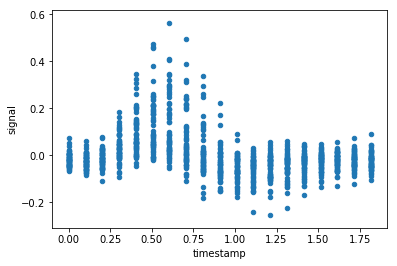

In [24]:
p = df.plot.scatter("timestamp", "signal")

# Density plot like hexbin are more appropriate to visualize finer variations in dentisty than scatter plots.
# p = df.plot.hexbin("timestamp", "signal")

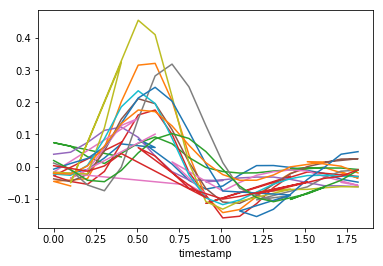

In [25]:
# Select stim event in frontal region
ind = (df["event"]=="stim") & (df["region"]=="frontal")

# Show plot
p = df[ind].set_index("timestamp").groupby("subject")["signal"].plot()

This is not obviously not linear, but let's try anyway to do a [linear regression using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [26]:
from sklearn.linear_model import LinearRegression

X = df[["timestamp"]]
Y = df[["signal"]]

# Alternatively:
# X = df["timestamp"].values.reshape(-1,1)
# Y = df["signal"].values.reshape(-1,1)

lr = LinearRegression(fit_intercept=True).fit(X, Y)

# Y_pred = lr.predict(X)

print(lr.coef_[0][0])
print(lr.intercept_[0])
print(lr.score(X, Y))  # Coefficient of determination R^2

-0.0469948939112
0.0462623993925
0.0766927978969


The goodness of fit is very low, as expected.